In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy import stats


SIZELIST = np.sort([int (i) for i in listdir("size_log/") if not i.startswith('.')])
SIZELIST = [1,2,4,8,16,32,64,128,256]

## Clients and Server Response Time

In [7]:
# taking the LAST line of each file, where I have the RESPONSE TIME of all experiment, and I mean them.

def aggregateSingleExperimentResponseTime(docSize):
    path = "size_log/"+str(docSize)+"/client/"
    list_files = [path+file for file in listdir(path) if not file.startswith('.')]
    performanceAggr = []
    for file in list_files:
        log = pd.read_csv(file, header=None).values
        performance = log[-1,0]
        performanceAggr =  np.append(performanceAggr, performance)
    
    return [np.sum(performanceAggr), np.std(performanceAggr)]

In [8]:
def aggregateAllExperimentsClient():
    aggregate = [[],[]]
    for i in (SIZELIST):
        single = aggregateSingleExperimentResponseTime(i)
        aggregate[0] = np.append(aggregate[0],single[0]) # mean list
        aggregate[1] = np.append(aggregate[1],single[1]) # std list
    
    return (aggregate)

In [9]:
def printAggrClient (avgAggr, stdAggr, label, marker):
    plt.xscale("log",basex=2)
    plt.yscale("log",basey=10)
    plt.plot(SIZELIST,avgAggr, linewidth=3.0, label=label, marker=marker, markersize=12)
    plt.fill_between(SIZELIST, avgAggr + stdAggr/2, avgAggr - stdAggr/2, alpha=0.3)

In [10]:
def extractResponseServer():
    readingList = []
    cleaningList = []
    serializingList = []
    countingList = []
    for i in SIZELIST:
        readingList.append(pd.read_csv("size_log/"+str(i)+"/server/readingtime.csv",header=None).values[1,1])
        cleaningList.append(pd.read_csv("size_log/"+str(i)+"/server/cleaningtime.csv",header=None).values[1,1])
        serializingList.append(pd.read_csv("size_log/"+str(i)+"/server/serializingtime.csv",header=None).values[1,1])
        countingList.append(pd.read_csv("size_log/"+str(i)+"/server/countingtime.csv",header=None).values[1,1])
    return [readingList, cleaningList, serializingList, countingList]

In [23]:
import matplotlib.ticker
import matplotlib as mpl

mpl.rcParams['ytick.major.size'] = 20
mpl.rcParams['ytick.major.width'] = 4
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['xtick.minor.width'] = 2
    
def printThePlot():
    [avgClient, stdClient] = aggregateAllExperimentsClient()
    [readingList, cleaningList, serializingList, countingList] = extractResponseServer()
    sumServer = np.sum([readingList, cleaningList, serializingList, countingList], axis=0)
    plt.figure(figsize=(15,12))
    
    printAggrClient(avgClient, stdClient, "avg over all clients","s")    
    plt.plot(SIZELIST, sumServer, linewidth=1.0, linestyle='--', label="Sum of Server RTs")
    plt.plot(SIZELIST, countingList, linewidth=3.0 ,marker='X', label="counting time", markersize=12)
    plt.plot(SIZELIST, cleaningList, linewidth=3.0, marker='o', label="cleaning time", markersize=12)
    plt.plot(SIZELIST, readingList, linewidth=3.0, marker='^', label="reading time", markersize=12)
    #plt.plot(SIZELIST, serializingList, linewidth=3.0, marker='d', label="serializing time", markersize=12)
    
    plt.xticks(SIZELIST, size=15)
    plt.yticks(size=15)
    plt.grid()
    xmajorLocator = matplotlib.ticker.FixedLocator(locs=SIZELIST) 
    xmajorFormatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_locator( xmajorLocator )
    plt.gca().xaxis.set_major_formatter( xmajorFormatter )
    plt.gca().xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    plt.ylabel("Response time [ms]", size = 15)
    plt.xlabel("Document size [KiB]", size = 15)
    plt.title("Response Time vs Document Size (log, log)\n", size = 15)
    plt.legend(loc="best", fontsize = 15)
    plt.show()

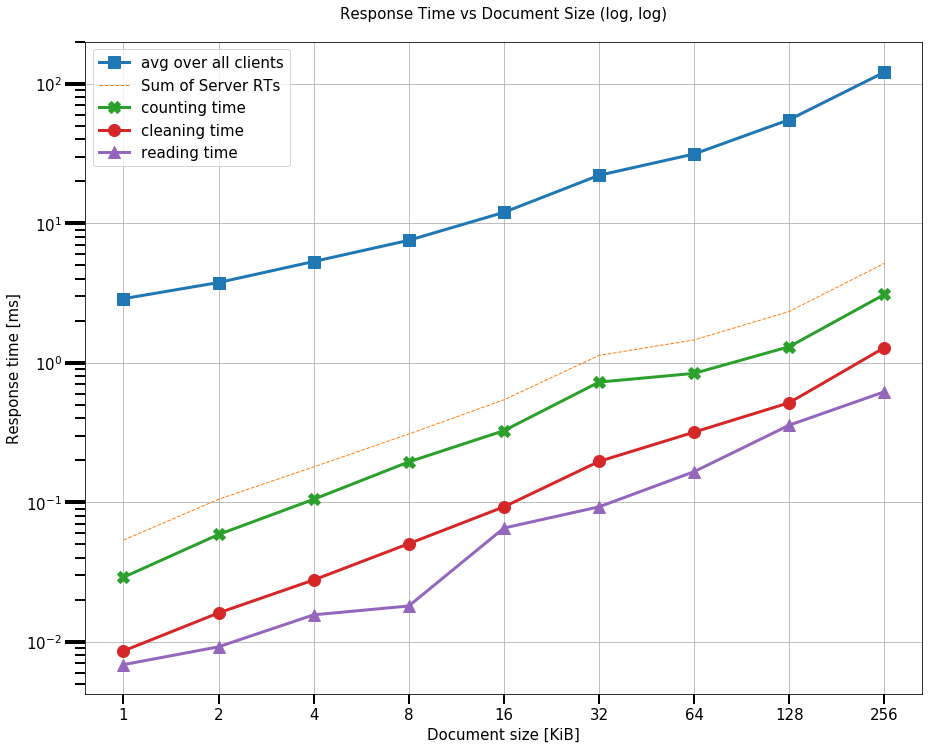

In [24]:
printThePlot()